# Race Review: PSSC Day 1

This is a general page that will display info about a race day.

In [3]:
# These are libraries written for RaceAnalysis
from global_variables import G
from nbutils import display_markdown, display
import race_logs
import metadata as m
import process as p
import analysis as a
import chart as ch
import utils
import numpy as np

import nbutils

# Initialize for Seattle.
G.init_seattle(logging_level="INFO")

2021-01-15 23:03:02,379|INFO|read_metadata| Read 112 records.
2021-01-15 23:03:02,379|INFO|read_logs| Reading file 2020-12-12_10:35.pd.gz
2021-01-15 23:03:03,269|INFO|read_log_file| Session from 2020-12-12 18:35:14.090000, 176617 rows, 4.905833333333334 hours.
2021-01-15 23:03:03,950|INFO|read_logs| Found 176616 records before trim.


<IPython.core.display.Javascript object>


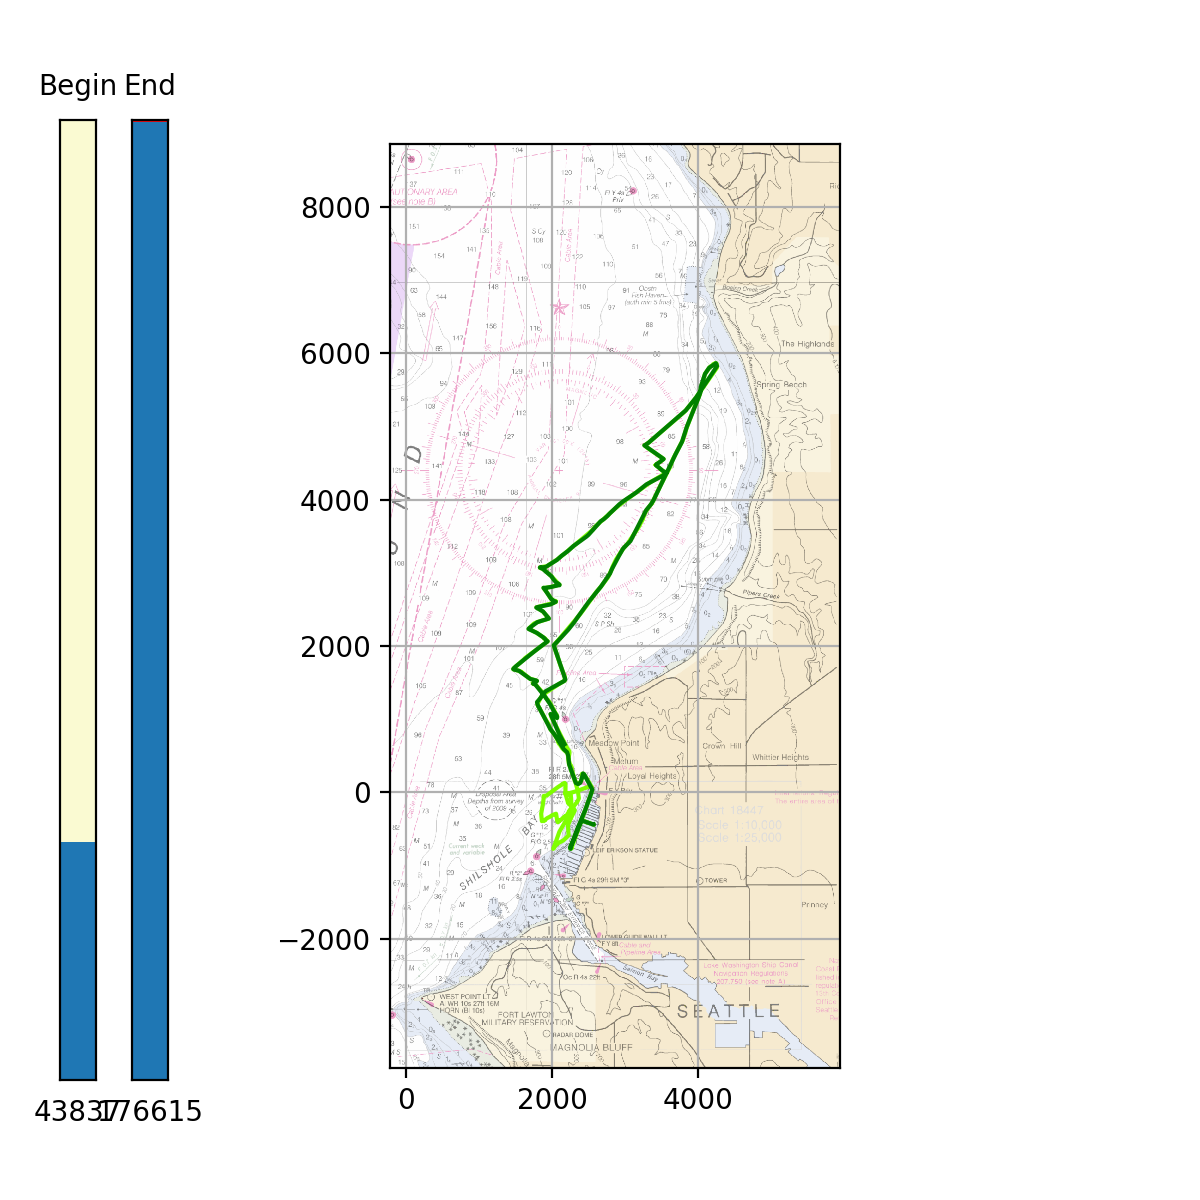

In [11]:
date = '2020-12-12'
df, race = race_logs.read_date(date, race_trim=False)
chart = ch.trim_track(df)

In [10]:
sdf = df.iloc[chart.begin:chart.end]
sdf

,turn_rate,rudder,row_seconds,rhdg,rcog,rsog,latitude,longitude,raws,rawa,...,tws,twa,stwd,stws,stwa,spd,sog,hdg,cog,row_times
346653,-0.511,-2.300,34665.300,37.500,64.100,0.580,47.684,-122.410,0.900,79.800,...,0.686,97.279,120.093,0.528,67.526,0.100,0.580,37.500,64.038,2020-12-12 11:16:11.349166999-08:00
346654,-0.511,-2.300,34665.400,37.500,64.200,0.580,47.684,-122.410,0.900,79.800,...,0.686,97.280,120.094,0.528,67.526,0.100,0.580,37.500,64.054,2020-12-12 11:16:11.356299244-08:00
346655,-0.511,-2.300,34665.500,37.500,64.200,0.580,47.684,-122.410,0.900,79.800,...,0.687,97.281,120.094,0.528,67.527,0.100,0.580,37.500,64.069,2020-12-12 11:16:11.363431488-08:00
346656,-0.511,-2.300,34665.600,37.500,64.200,0.580,47.684,-122.410,0.900,79.800,...,0.688,97.282,120.095,0.528,67.527,0.100,0.580,37.500,64.082,2020-12-12 11:16:11.370563733-08:00
346657,-0.511,-2.300,34665.700,37.500,64.200,0.580,47.684,-122.410,0.900,79.800,...,0.688,97.283,120.095,0.528,67.528,0.100,0.580,37.500,64.094,2020-12-12 11:16:11.377695977-08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696419,0.286,1.700,69641.900,304.900,308.800,1.460,47.702,-122.417,2.880,29.000,...,1.150,77.035,55.173,0.841,95.205,1.302,1.448,304.721,309.143,2020-12-12 12:18:21.775604107-08:00
696420,0.225,1.500,69642.000,304.900,308.500,1.450,47.702,-122.417,2.880,29.000,...,1.150,77.029,55.172,0.841,95.205,1.302,1.449,304.756,309.079,2020-12-12 12:18:21.875735905-08:00
696421,0.104,1.300,69642.100,305.000,308.400,1.450,47.702,-122.417,2.880,28.100,...,1.150,76.924,55.171,0.841,95.104,1.295,1.449,304.805,309.011,2020-12-12 12:18:21.975867704-08:00
696422,-0.005,1.100,69642.200,305.000,308.400,1.440,47.702,-122.417,2.380,27.400,...,1.150,76.920,55.171,0.841,95.104,1.290,1.447,304.844,308.950,2020-12-12 12:18:22.075999502-08:00


In [ ]:
if chart.is_trimmed:
    display("Updating Trim!")
    race_logs.trim_race(race, chart.begin, chart.end)

In [ ]:
rudder, rrr = p.exponential_filter(np.array(df.rudder), 0.9, 4)
spd, rrr = p.exponential_filter(np.array(df.spd), 0.999, 2)
awa, rrr = p.exponential_filter_angle(np.array(df.awa), 0.999, 10)
df['vmg'] = np.cos(np.radians(df.twa)) * df.spd

In [ ]:
ccc = ch.chart_and_plot(df, None, (df.awa, awa, rudder*10, df.zg100_roll+3.5, df.twa), (df.tws*1.944, df.spd*1.944, spd*1.944, df.vmg*1.944, df.sog*1.944))

In [ ]:
sdf = df.iloc[ccc.begin:ccc.end]
sdf.vmg.mean()*1.944, sdf.spd.mean()*1.944

In [ ]:
heel = sdf.zg100_roll+3.5
heel[heel > 0].mean()

In [ ]:
df.iloc[37510].row_times